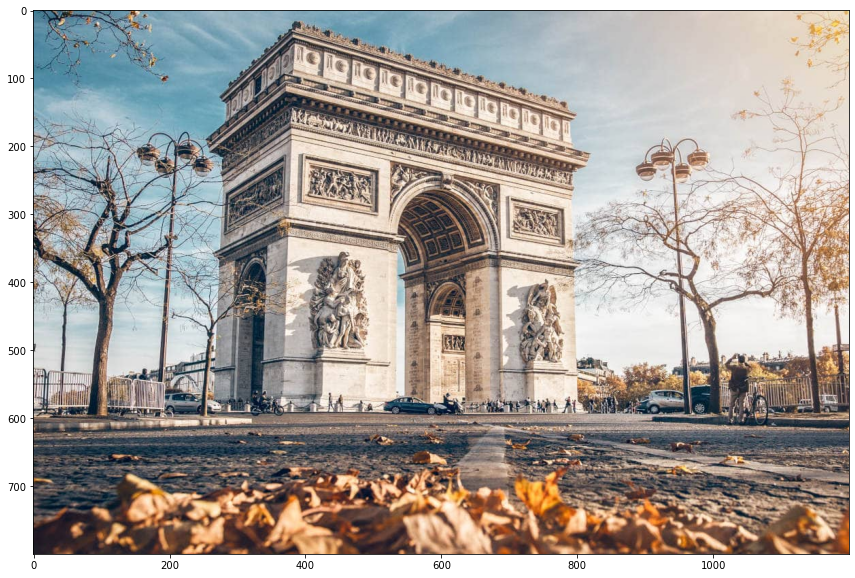

In [21]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (18,10)  # Ustawienie rozmarów wyświetlanych obrazów

image = cv.imread("images/example.jpg")
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(image)

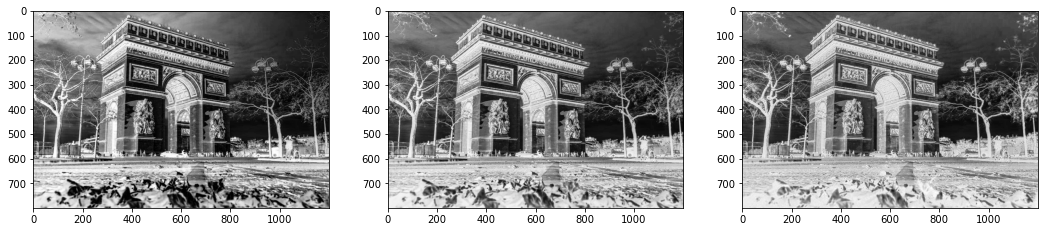

In [16]:
image_copy = image.copy()
fig, ax = plt.subplots(1, 3)
ax[0].imshow(image_copy[:, :, 0], cmap="Greys")  # or Reds
ax[1].imshow(image_copy[:, :, 1], cmap="Greys")  # or Greens
ax[2].imshow(image_copy[:, :, 2], cmap="Greys")  # or Blues

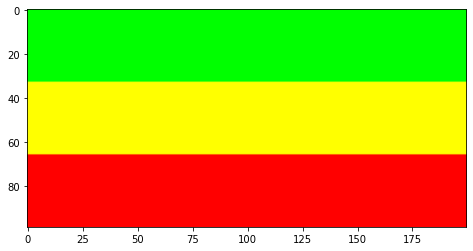

In [18]:
flag = np.empty((99, 200, 3), dtype=float)
for x in range(99):
    for y in range(200):
        if x < 33:
            flag[x, y, :] = [0, 1, 0]
        elif x < 66:
            flag[x, y, :] = [1, 1, 0]
        else:
            flag[x, y, :] = [1, 0, 0]
            
plt.figure(figsize = (8,4))
plt.imshow(flag)

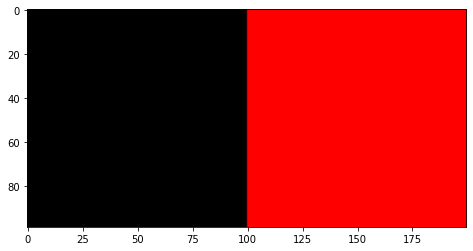

In [13]:
flag = np.empty((99, 200, 3), dtype=float)
flag[:, :100, :] = [0, 0, 0]
flag[:, 100:200, :] = [1, 0, 0]
            
plt.figure(figsize = (8,4))
plt.imshow(flag)

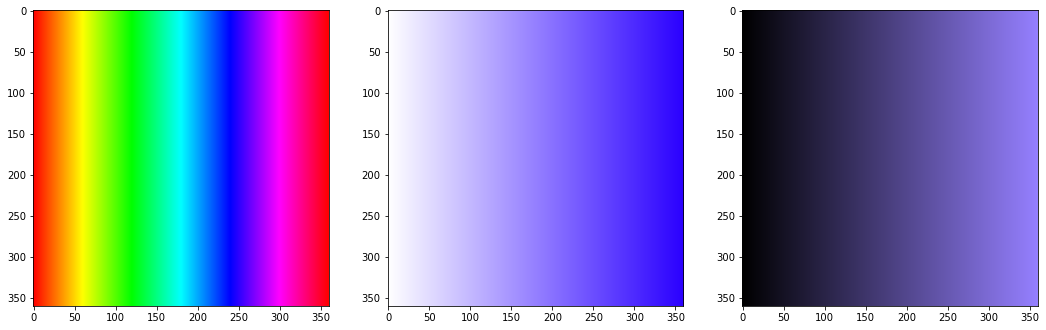

In [14]:
fig, ax = plt.subplots(1, 3)

hsvimg = np.empty((360, 360, 3), dtype=np.float32)
hsvimg[:,:,0] = np.linspace(0, 360, 360)
hsvimg[:,:,1] = 1
hsvimg[:,:,2] = 1
rgbimg1 = cv.cvtColor(hsvimg, cv.COLOR_HSV2RGB)
ax[0].imshow(rgbimg1) # wybieram  kolor -> 250

hsvimg[:,:,0] = 250
hsvimg[:,:,1] = np.linspace(0, 1, 360)
hsvimg[:,:,2] = 1
rgbimg2 = cv.cvtColor(hsvimg, cv.COLOR_HSV2RGB)
ax[1].imshow(rgbimg2) # wybieram  nasycenie 180 -> 180/360 = 0.5 

hsvimg[:,:,0] = 250
hsvimg[:,:,1] = 0.5
hsvimg[:,:,2] = np.linspace(0, 1, 360)
rgbimg3 = cv.cvtColor(hsvimg, cv.COLOR_HSV2RGB)
ax[2].imshow(rgbimg3) # wybieram  jasnosc

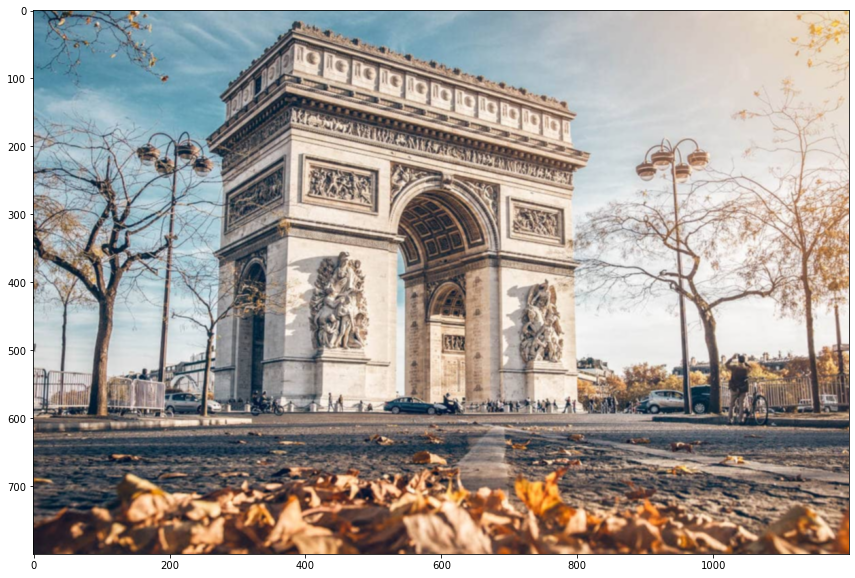

In [11]:
kernel = [
    [2, 4, 2],
    [4, 8, 4],
    [2, 4, 2],
]
kernel = np.asarray(kernel)
kernel = kernel/kernel.sum()
filtered_image = cv.filter2D(image, -1, kernel=kernel) 

plt.imshow(filtered_image)

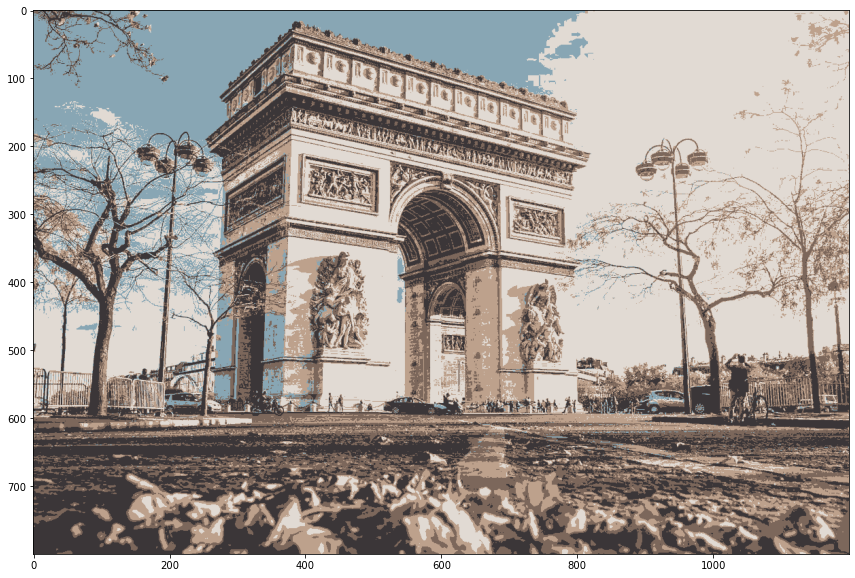

In [17]:
img = image.reshape((-1,3))
img = np.float32(img)

K = 5
criteria = (
    cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER,
    10,
    1.0)

ret, label, center = (
    cv.kmeans(
        img, K, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
)

center = np.uint8(center)
res = center[label.flatten()]
res = res.reshape((image.shape))
plt.imshow(res)

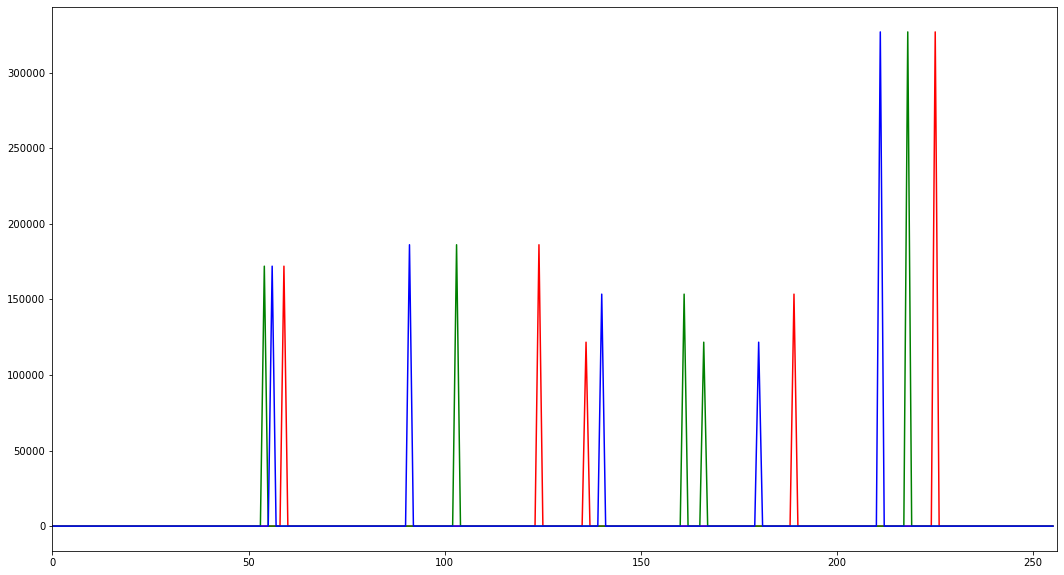

In [20]:
color = ('r','g','b')
for i, col in enumerate(color):
    histr = cv.calcHist([res], [i], None, [256], [0,256])
    plt.plot(histr, color = col)
    plt.xlim([0,256])